# K-means Algorithm form Scratch
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. A cluster refers to a collection of data points aggregated together because of certain similarities.You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [1]:
# importing the libraries
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

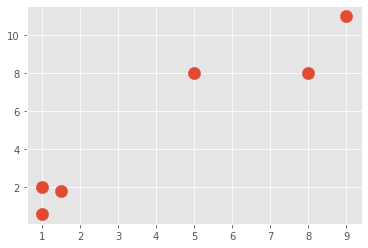

In [2]:
# plotting the random data points
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

# scatterplot of the random data points
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

## How K-means Algorithm works
1. Choose value for K
2. Randomly select K featuresets to start as your centroids
3. Calculate distance of all other featuresets to centroids
4. Classify other featuresets as same as closest centroid
5. Take mean of each class (mean of all featuresets by class), making that mean the new centroid
6. Repeat steps 3-5 until optimized (centroids no longer moving)

In [12]:
# Building the class for the algorithm
class K_Means:
    
    # defining the init function
    # choosing K=2, begin building our K Means class:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    # working on the fit method:
    # begin iterating through our max_iter value. here, we start with empty classifications, and then create two dict keys (by iterating through range of self.k).
    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            # iterate through our features, calculate distances of the features to the current centroids, and classify them as such:    
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            # going to need to create the new centroids, as well as measuring the movement of the centroids. If that movement is less than our tolerance (self.tol),
            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            # start off assuming we are optimized. We then take all of the centroids, and compare them to the previous centroids. If they are within our required tolerance, then we're happy. If not, then we set optimized to False and we continue in our for for i in range(self.max_iter): loop.
            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

453.3333333333334
102.72108843537411


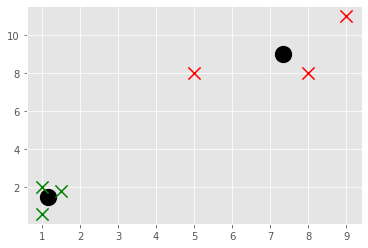

In [14]:
# fitting the points to the class and plotting
clf = K_Means()
clf.fit(X)
colors = 10*["g","r","c","b","k"]

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

453.3333333333334
102.72108843537411


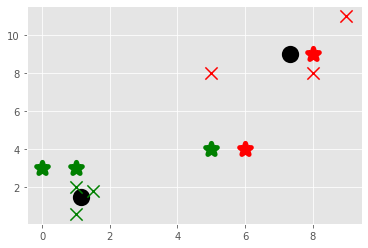

In [15]:
# fitting the points to the class and plotting for understanding in better way
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        


unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()